In [23]:
import qiskit

In [24]:
qiskit.__version__

'1.1.0'

In [25]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel = "ibm_quantum", 
                               token = "e5b9d1d7ab677f9ecb333b9800ece9a38a6ec9377482a6ea4d91cf53d09d39f84dd50c1ea9d07b60602486e43367e474ac78300c3ca017f912e3949f78d1859c")

In [26]:
#save so I don't need to keep entering tokens each time
QiskitRuntimeService.save_account(channel ='ibm_quantum',
                                  overwrite = 'True',
                                  token = 'e5b9d1d7ab677f9ecb333b9800ece9a38a6ec9377482a6ea4d91cf53d09d39f84dd50c1ea9d07b60602486e43367e474ac78300c3ca017f912e3949f78d1859c')

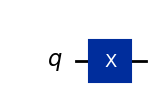

In [27]:
#check that everything is working correctly
from qiskit import QuantumCircuit

# Create a new circuit with a single qubit
qc = QuantumCircuit(1)

# Add a Not gate to qubit 0
qc.x(0)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

In [28]:
### Install the other required packages as well

%pip install qiskit_aer
%pip install qiskit_ibm_runtime
%pip install matplotlib
%pip install pylatexenc
%pip install qiskit-transpiler-service
%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /private/var/folders/66/7hvj9wvn2yj3mtg3bd4w8tjh0000gn/T/pip-req-build-hvbq4_5l
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /private/var/folders/66/7hvj9wvn2yj3mtg3bd4w8tjh0000gn/T/pip-req-build-hvbq4_5l
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit cdaecf0af5ffb66e38afc655395708d43d1d4e3a
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [29]:
# Save your API token to track your progress

%set_env QXToken=e5b9d1d7ab677f9ecb333b9800ece9a38a6ec9377482a6ea4d91cf53d09d39f84dd50c1ea9d07b60602486e43367e474ac78300c3ca017f912e3949f78d1859c

# Make sure there is no space between the equal sign
# and the beginning of your token

env: QXToken=e5b9d1d7ab677f9ecb333b9800ece9a38a6ec9377482a6ea4d91cf53d09d39f84dd50c1ea9d07b60602486e43367e474ac78300c3ca017f912e3949f78d1859c


In [30]:
### Imports

from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
from qc_grader.challenges.iqc_2024 import grade_lab0_ex1

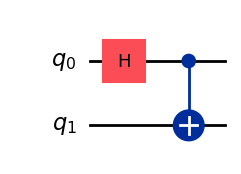

In [31]:
# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a CNOT gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

In [32]:
# The ZZ applies a Z operator on qubit 0, and a Z operator on qubit 1
ZZ = SparsePauliOp('ZZ')

# The ZI applies a Z operator on qubit 0, and an Identity operator on qubit 1
ZI = SparsePauliOp('ZI')

# The IX applies an Identity operator on qubit 0, and an X operator on qubit 1
IX = SparsePauliOp('IX')



### Write your code below here ###
### Follow the same naming convention we used above
IZ = SparsePauliOp('IZ')

XX = SparsePauliOp('XX')

XI = SparsePauliOp('XI')

## Don't change any code past this line, but remember to run the cell.

observables = [IZ, IX, ZI, XI, ZZ, XX]

In [33]:
# Submit your answer using following code

grade_lab0_ex1(observables)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [34]:
# Set up the Estimator
estimator = Estimator(backend=AerSimulator())

# Submit the circuit to Estimator
pub = (qc, observables)

job = estimator.run(pubs=[pub])

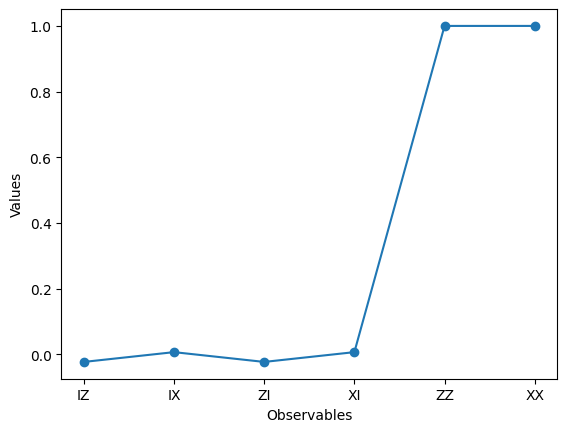

In [35]:
# Collect the data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result()[0].data.evs

# Set up our graph
container = plt.plot(data, values, '-o')

# Label each axis
plt.xlabel('Observables')
plt.ylabel('Values')

# Draw the final graph
plt.show()

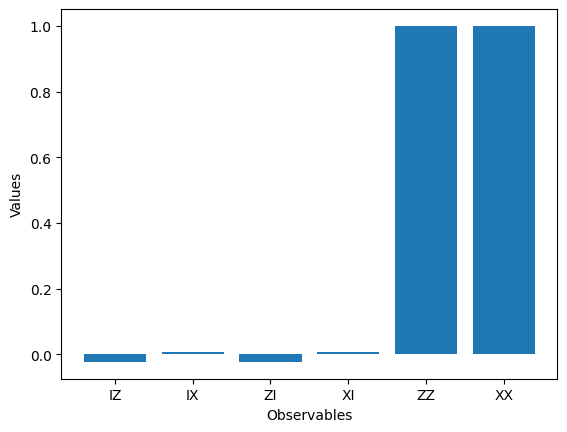

In [36]:
container = plt.bar(data, values, width=0.8)

plt.xlabel('Observables')
plt.ylabel('Values')

plt.show()